In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU

Using TensorFlow backend.


In [2]:
default = 0

In [3]:
column_list = [
    #'abs_loan.reportingperiodbeginningdate',
'abs_loan.originalloanamount',
'abs_loan.originalloanterm',
'abs_loan.originalinterestratepercentage',
'abs_loan.vehiclenewusedcode',
'abs_loan.vehiclevalueamount',
'abs_loan.obligorcreditscore',
'abs_loan.obligorincomeverificationlevelcode',
'abs_loan.obligoremploymentverificationcode',
#'abs_loan.coobligorindicator', 
'abs_loan.paymenttoincomepercentage',
'abs_loan.remainingtermtomaturitynumber',
'abs_loan.reportingperiodbeginningloanbalanceamount',
'abs_loan.nextreportingperiodpaymentamountdue',
'abs_loan.reportingperiodinterestratepercentage',
'abs_loan.nextinterestratepercentage',
'abs_loan.servicingfeepercentage',
'abs_loan.otherservicerfeeretainedbyservicer',
'abs_loan.otherassesseduncollectedservicerfeeamount',
'abs_loan.scheduledinterestamount', 
'abs_loan.scheduledprincipalamount',
'abs_loan.otherprincipaladjustmentamount',
'abs_loan.reportingperiodactualendbalanceamount',
'abs_loan.reportingperiodscheduledpaymentamount',
'abs_loan.totalactualamountpaid',
'abs_loan.actualinterestcollectedamount',
'abs_loan.actualprincipalcollectedamount',
'abs_loan.actualothercollectedamount',
'abs_loan.serviceradvancedamount', 
#'abs_loan.interestpaidthroughdate',
'abs_loan.currentdelinquencystatus']

In [4]:
df=pd.read_csv('c:/users/ugy1/abs/datasets/s3/abs_loan.csv', 
               #use_cols=column_list, 
               nrows=420000, 
               low_memory=True, 
              index_col='abs_loan.originationdate', 
               parse_dates=True
              )

In [5]:
print(len(df.columns))
df.columns

73


Index(['abs_loan.cik', 'abs_loan.accessionnumber', 'abs_loan.assettypenumber',
       'abs_loan.assetnumber', 'abs_loan.reportingperiodbeginningdate',
       'abs_loan.reportingperiodendingdate', 'abs_loan.originatorname',
       'abs_loan.originalloanamount', 'abs_loan.originalloanterm',
       'abs_loan.loanmaturitydate', 'abs_loan.originalinterestratepercentage',
       'abs_loan.interestcalculationtypecode',
       'abs_loan.originalinterestratetypecode',
       'abs_loan.originalinterestonlytermnumber',
       'abs_loan.originalfirstpaymentdate', 'abs_loan.underwritingindicator',
       'abs_loan.graceperiodnumber', 'abs_loan.paymenttypecode',
       'abs_loan.subvented', 'abs_loan.vehiclemanufacturername',
       'abs_loan.vehiclemodelname', 'abs_loan.vehiclenewusedcode',
       'abs_loan.vehiclemodelyear', 'abs_loan.vehicletypecode',
       'abs_loan.vehiclevalueamount', 'abs_loan.vehiclevaluesourcecode',
       'abs_loan.obligorcreditscoretype', 'abs_loan.obligorcreditscore',
 

In [6]:
df.shape

(420000, 73)

In [7]:
df.dtypes

abs_loan.cik                                            int64
abs_loan.accessionnumber                               object
abs_loan.assettypenumber                               object
abs_loan.assetnumber                                    int64
abs_loan.reportingperiodbeginningdate                  object
abs_loan.reportingperiodendingdate                     object
abs_loan.originatorname                                object
abs_loan.originalloanamount                           float64
abs_loan.originalloanterm                               int64
abs_loan.loanmaturitydate                              object
abs_loan.originalinterestratepercentage               float64
abs_loan.interestcalculationtypecode                    int64
abs_loan.originalinterestratetypecode                   int64
abs_loan.originalinterestonlytermnumber               float64
abs_loan.originalfirstpaymentdate                      object
abs_loan.underwritingindicator                           bool
abs_loan

In [8]:
df.columns

Index(['abs_loan.cik', 'abs_loan.accessionnumber', 'abs_loan.assettypenumber',
       'abs_loan.assetnumber', 'abs_loan.reportingperiodbeginningdate',
       'abs_loan.reportingperiodendingdate', 'abs_loan.originatorname',
       'abs_loan.originalloanamount', 'abs_loan.originalloanterm',
       'abs_loan.loanmaturitydate', 'abs_loan.originalinterestratepercentage',
       'abs_loan.interestcalculationtypecode',
       'abs_loan.originalinterestratetypecode',
       'abs_loan.originalinterestonlytermnumber',
       'abs_loan.originalfirstpaymentdate', 'abs_loan.underwritingindicator',
       'abs_loan.graceperiodnumber', 'abs_loan.paymenttypecode',
       'abs_loan.subvented', 'abs_loan.vehiclemanufacturername',
       'abs_loan.vehiclemodelname', 'abs_loan.vehiclenewusedcode',
       'abs_loan.vehiclemodelyear', 'abs_loan.vehicletypecode',
       'abs_loan.vehiclevalueamount', 'abs_loan.vehiclevaluesourcecode',
       'abs_loan.obligorcreditscoretype', 'abs_loan.obligorcreditscore',
 

In [9]:
column_list=[x.lower() for x in (column_list)]

In [10]:
df=df[column_list]

In [11]:
df.columns=df.columns.str.replace('abs_loan.','')

In [12]:
df.describe()

,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclenewusedcode,vehiclevalueamount,obligorcreditscore,obligorincomeverificationlevelcode,obligoremploymentverificationcode,paymenttoincomepercentage,remainingtermtomaturitynumber,...,scheduledprincipalamount,otherprincipaladjustmentamount,reportingperiodactualendbalanceamount,reportingperiodscheduledpaymentamount,totalactualamountpaid,actualinterestcollectedamount,actualprincipalcollectedamount,actualothercollectedamount,serviceradvancedamount,currentdelinquencystatus
count,420000.000000,420000.000000,420000.000000,420000.000000,4.200000e+05,420000.000000,420000.0,420000.0,420000.000000,420000.000000,...,420000.000000,420000.000000,420000.000000,420000.00000,420000.000000,420000.000000,420000.000000,420000.000000,420000.000000,420000.000000
mean,33741.512412,61.369971,2.434259,1.436686,4.593955e+04,779.414198,2.0,2.0,6.179419,43.684348,...,506.356638,327.567757,22118.292326,553.81530,847.560450,44.656931,808.067232,4.665264,1.305540,0.421443
std,16405.971306,10.096222,1.532988,0.495976,7.917621e+04,65.809843,0.0,0.0,5.401930,14.387148,...,296.731041,2811.311466,14912.620627,317.21954,2851.991029,50.102702,2846.720456,31.809362,12.467181,3.893368
min,3741.290000,16.000000,0.010000,1.000000,0.000000e+00,0.000000,2.0,2.0,0.000000,0.000000,...,0.000000,-72031.970000,0.000000,0.00000,-72031.970000,-1303.820000,-72031.970000,0.000000,0.000000,-9.000000
25%,22669.510000,60.000000,1.000000,1.000000,3.115000e+04,729.000000,2.0,2.0,2.990000,37.000000,...,338.450000,0.000000,12393.772500,374.66750,360.160000,14.780000,330.487500,0.000000,0.000000,0.000000
50%,30809.910000,60.000000,1.900000,1.000000,4.331000e+04,786.000000,2.0,2.0,4.940000,46.000000,...,469.165000,0.000000,20506.910000,514.61000,520.000000,31.820000,481.730000,0.000000,0.000000,0.000000
75%,41298.940000,72.000000,2.990000,2.000000,5.647000e+04,834.000000,2.0,2.0,7.870000,53.000000,...,630.000000,0.000000,29760.492500,687.59000,732.590000,58.540000,676.820000,0.000000,0.000000,0.000000
max,189984.120000,72.000000,15.140000,2.000000,1.021234e+07,900.000000,2.0,2.0,96.950000,72.000000,...,4945.480000,113665.770000,177603.400000,4975.23000,116238.070000,2083.070000,115756.120000,3831.100000,881.840000,212.000000


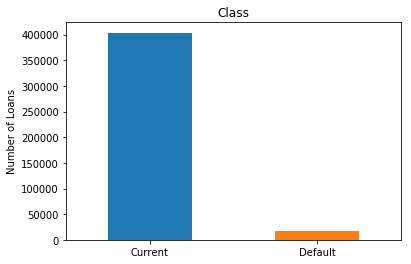

Number of loans Current : 403699     Number of loans Defaulted : 16301


In [13]:
LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.currentdelinquencystatus>default, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

In [14]:
pd.value_counts(df.currentdelinquencystatus)

 0      403697
 1        2382
 2        1769
 3        1426
 4        1307
 5        1061
 6         934
 7         896
 8         645
 9         498
 10        467
 11        396
 12        385
 14        329
 17        315
 13        297
 15        296
 16        260
 18        218
 19        200
 21        170
 20        163
 23        129
 26        123
 25        110
 22        107
 27        106
 28        101
 24         89
 32         77
         ...  
 86          2
 87          2
 90          2
 110         2
 164         2
 92          2
 95          2
 97          2
 98          2
 106         2
 195         1
 182         1
 179         1
 210         1
 173         1
 171         1
 212         1
 184         1
-9           1
 166         1
 143         1
 140         1
 137         1
 136         1
 135         1
 132         1
 129         1
 128         1
 84          1
-1           1
Name: currentdelinquencystatus, Length: 149, dtype: int64

In [15]:
def map_label(*args):
    columns = [c for c in args]
    for column in columns:
        if column > 0:
            return 0
        elif column <= 0:
            return 1
        
       

In [16]:
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

In [17]:
pd.value_counts(df.label)

1    403699
0     16301
Name: label, dtype: int64

In [18]:
df.fillna(0, inplace=True)

In [19]:
df=df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.dtypes

originalloanamount                           float64
originalloanterm                               int64
originalinterestratepercentage               float64
vehiclenewusedcode                             int64
vehiclevalueamount                           float64
obligorcreditscore                             int64
obligorincomeverificationlevelcode             int64
obligoremploymentverificationcode              int64
paymenttoincomepercentage                    float64
remainingtermtomaturitynumber                  int64
reportingperiodbeginningloanbalanceamount    float64
nextreportingperiodpaymentamountdue          float64
reportingperiodinterestratepercentage        float64
nextinterestratepercentage                   float64
servicingfeepercentage                       float64
otherservicerfeeretainedbyservicer           float64
otherassesseduncollectedservicerfeeamount    float64
scheduledinterestamount                      float64
scheduledprincipalamount                     f

In [20]:
df.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclenewusedcode,vehiclevalueamount,obligorcreditscore,obligorincomeverificationlevelcode,obligoremploymentverificationcode,paymenttoincomepercentage,remainingtermtomaturitynumber,...,otherprincipaladjustmentamount,reportingperiodactualendbalanceamount,reportingperiodscheduledpaymentamount,totalactualamountpaid,actualinterestcollectedamount,actualprincipalcollectedamount,actualothercollectedamount,serviceradvancedamount,currentdelinquencystatus,label
abs_loan.originationdate,,,,,,,,,,,,,,,,,,,,,
2012-12-31,25124.50,72,3.29,1,44395.0,812,2,2,2.66,13,...,0.0,4479.55,385.00,385.00,13.30,371.70,0.0,0.0,0,1
2012-12-31,43257.34,72,3.29,1,50595.0,817,2,2,3.99,14,...,0.0,8328.13,663.71,663.71,24.58,639.13,0.0,0.0,0,1
2012-12-31,56917.54,72,3.29,1,62695.0,818,2,2,6.97,14,...,0.0,11979.91,873.39,873.39,35.14,838.25,0.0,0.0,0,1
2012-12-31,42003.57,72,3.29,1,46995.0,791,2,2,2.96,13,...,0.0,8182.63,643.71,643.71,24.12,619.59,0.0,0.0,0,1
2012-12-31,77217.85,72,3.29,1,76145.0,712,2,2,10.37,14,...,0.0,16336.95,1184.89,1160.89,47.92,1136.97,24.0,0.0,0,1


In [21]:
Y=df.label.values

In [22]:
Y.shape

(420000,)

In [23]:
Y=Y.reshape(Y.shape[0],1)

In [24]:
Y.shape

(420000, 1)

In [25]:
input=df.values
input.shape

(420000, 29)

In [26]:
train_split = 0.70
len_train = int(len(input)*train_split)
print(len_train)

294000


In [27]:
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [28]:
df.drop(['currentdelinquencystatus','label'], axis=1, inplace=True)

In [29]:
input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

(420000, 29, 1)

In [30]:
x_train = input[0:len_train]
x_test = input[len_train:]

In [31]:
x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
x_train_keras_scaled.shape

(294000, 29, 1)

In [32]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, activation='relu', input_shape=(x_train_keras_scaled.shape[1:]), return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1, validation_data=(x_test_keras_scaled, y_test))

test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)


Train on 294000 samples, validate on 126000 samples
Epoch 1/10
294000/294000 [==============================] - 562s 2ms/step - loss: 0.6345 - acc: 0.9606 - val_loss: 0.4585 - val_acc: 0.9569
Epoch 2/10
294000/294000 [==============================] - 566s 2ms/step - loss: 0.5997 - acc: 0.9628 - val_loss: 0.3321 - val_acc: 0.9569
Epoch 3/10
294000/294000 [==============================] - 571s 2ms/step - loss: 0.5962 - acc: 0.9630 - val_loss: 0.3321 - val_acc: 0.9569
Epoch 4/10
294000/294000 [==============================] - 544s 2ms/step - loss: 0.5962 - acc: 0.9630 - val_loss: 0.3321 - val_acc: 0.9569
Epoch 5/10
294000/294000 [==============================] - 580s 2ms/step - loss: 0.5962 - acc: 0.9630 - val_loss: 0.3321 - val_acc: 0.9569
Epoch 6/10
203712/294000 [===================>..........] - ETA: 2:37 - loss: 0.6018 - acc: 0.9627

KeyboardInterrupt: 